In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-05-15 / Aki Taanila


# Dummy-muuttujien yhteenveto selittävän muuttujan mukaan

Dummy-muuttujaksi (binäärinen, dikotominen) kutsutaan muuttujaa, joka saa arvokseen joko 0 (joskus tämän sijasta käytetään tyhjää solua) tai 1. 

Esimerkiksi kyselytutkimuksessa monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin kuin yhden, koodataan dummy-muuttujiksi: Jokainen kysymyksen vaihtoehto on muuttuja, joka saa arvokseen 1, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.

Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysmystä ei kannata koodata dummy-muuttujiksi paitsi koneoppimisen malleja käytettäessä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Yhteenvetoon otettavien dikotomisten muuttujien nimet
dikot = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

# Miesten ja naisten lukumäärät
miehet_n = len(df[df['sukup']==1])
naiset_n = len(df[df['sukup']==2])

# Miesten ja naisten otsikoinnit
miehet = f'Miehet, n = {miehet_n}'
naiset = f'Naiset, n = {naiset_n}'

## Lukumäärät taulukkona ja grafiikkana

Seabornin barplot sopii hyvin yhteenvedon graafiseen esittämiseen, koska kaaviolle voi estimator-parametrilla määrittää laskentamenetelmäksi summan (summaa yhteen muuttujan arvoina olevia ykkösiä).

In [5]:
# Valintojen lukumäärät sukupuolen mukaan
df1 = df.groupby('sukup')[dikot].sum()

# Riviotsikot (edellä määritellyt miesten ja naisten otsikoinnit)
df1.index = [miehet, naiset]

# Ulkoasun viimeistely
df1.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
"Miehet, n = 63",35,16,8,13
"Naiset, n = 19",12,4,1,9


Text(0, 0.5, 'Lukumäärä')

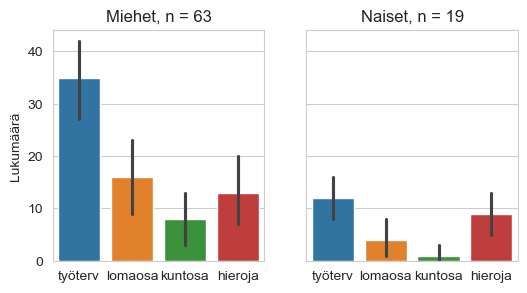

In [6]:
# Luodaan kahden kaavion kuvio
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 3))

# Puuttuvien arvojen korvaaminen arvolla 0 (fillna(0)) on välttämätön vain joissain versioissa
sns.barplot(data=df[dikot][df['sukup']==1].fillna(0), ax=axs[0], estimator=sum)
sns.barplot(data=df[dikot][df['sukup']==2].fillna(0), ax=axs[1], estimator=sum)

axs[0].set_title(miehet)
axs[1].set_title(naiset)
axs[0].set_ylabel('Lukumäärä')

## Prosenttiyhteenveto

In [7]:
# Valintojen lukumäärät sukupuolen mukaan
df1 = df.groupby('sukup')[dikot].sum()

# Prosenttien laskenta: iloc[0] viittaa df1:n ensimmäiseen riviin ja iloc[1] toiseen riviin
df1.iloc[0] = df1.iloc[0]/miehet_n*100
df1.iloc[1] = df1.iloc[1]/naiset_n*100

# Riviotsikot
df1.index = [miehet, naiset]

# Prosenttilukujen ulkoasun viimeistely
df1.style.format('{:.1f} %')

,työterv,lomaosa,kuntosa,hieroja
"Miehet, n = 63",55.6 %,25.4 %,12.7 %,20.6 %
"Naiset, n = 19",63.2 %,21.1 %,5.3 %,47.4 %


## Lisätietoa

Data-analytiikka Pythonilla https://tilastoapu.wordpress.com/python/